Topic: Project 2    
Subject: Building the Model    
Date: 10/06/2017  
Name: Zach Heick

#### Order of Events
  1. [Scraping Ebert Ratings](https://github.com/ZachHeick/Project_Luther/blob/master/Project_Notebooks/Project_Luther_Scraping_Ebert_Data.ipynb)
  2. [Cleaning Ebert Data](https://github.com/ZachHeick/Project_Luther/blob/master/Project_Notebooks/Project_Luther_Cleaning_Ebert_Data.ipynb)
  3. [Scraping and Cleaning Other Movie Data](https://github.com/ZachHeick/Project_Luther/blob/master/Project_Notebooks/Project_Luther_Scraping_Other_Data.ipynb)
  4. [Exploring and Analyzing the Data](https://github.com/ZachHeick/Project_Luther/blob/master/Project_Notebooks/Project_Luther_EDA.ipynb)
  5. [Building the Model](https://github.com/ZachHeick/Project_Luther/blob/master/Project_Notebooks/Project_Luther_Models.ipynb)

In [21]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [22]:
df = pd.read_pickle('roger_final_model_ready.pickle')

Before I began modeling, I split the data up into training and test sets. 

In [23]:
X = df.drop('Star_Score', axis=1)
y = df['Star_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

The features I start with are `MovieLens_Score` and `Imdb_Score`. I slowly add features that have either stronger positively correlation or stronger negatively correlation until I was I get to an Adjusted R-squared value that is best.

In [24]:
X_1 = X_train[[
    'Runtime',
    'MovieLens_Score',
    'Imdb_Score',
    'Genre_Animation',
    'Genre_Comedy',
    'Genre_Crime',
    'Genre_Documentary',
    'Genre_Drama',
    'Genre_Family',
    'Genre_Music',
    'Genre_Thriller',
    'Sub_Genre_Animation',
    'Sub_Genre_Comedy',
    'Sub_Genre_Family',
    'Sub_Genre_Fantasy',
    'Sub_Genre_Horror',
    'Sub_Genre_No Sub-genre',
    'Sub_Genre_Romance'
]]
model = sm.OLS(y_train, X_1)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Star_Score   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     2773.
Date:                Sat, 07 Oct 2017   Prob (F-statistic):               0.00
Time:                        16:11:18   Log-Likelihood:                -3639.5
No. Observations:                3324   AIC:                             7315.
Df Residuals:                    3306   BIC:                             7425.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Runtime                    0.0022      0.001      3.814      0.000       0.001       0.003
MovieLens_Score            0.3283      0.049      6.736      0.000       0.233       0.424
Imdb_Score                 0.2005      0.025      7.998      0.000       0.151       0.250
Genre_Animation            0.5713      0.115      4.964      0.000       0.346       0.797
Genre_Comedy               0.1859      0.035      5.358      0.000       0.118       0.254
Genre_Crime                0.2508      0.070      3.576      0.000       0.113       0.388
Genre_Documentary          0.4258      0.070      6.072      0.000       0.288       0.563
Genre_Drama                0.3861      0.036     10.688      0.000       0.315       0.457
Genre_Family               0.4924      0.298      1.650      0.099      -0.093       1.077
Genre_Music                0.9433      0.515      1.832      0.067      -0.066       1.953
Genre_Thriller             0.6729      0.235      2.867      0.004       0.213       1.133
Sub_Genre_Animation        0.4110      0.140      2.938      0.003       0.137       0.685
Sub_Genre_Comedy          -0.1640      0.059     -2.802      0.005      -0.279      -0.049
Sub_Genre_Family          -0.1028      0.061     -1.673      0.094      -0.223       0.018
Sub_Genre_Fantasy         -0.2435      0.092     -2.658      0.008      -0.423      -0.064
Sub_Genre_Horror          -0.2751      0.085     -3.233      0.001      -0.442      -0.108
Sub_Genre_No Sub-genre    -0.1821      0.044     -4.145      0.000      -0.268      -0.096
Sub_Genre_Romance         -0.1850      0.050     -3.701      0.000      -0.283      -0.087
==============================================================================
Omnibus:                      205.617   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.278
Skew:                          -0.626   Prob(JB):                     3.32e-54
Kurtosis:                       3.458   Cond. No.                     4.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I couldn't just rely on the adjusted R-squared value for measuring my model. I also need to look at the distribution of residuals to make sure the model is capturing all trends across the whole set of training data. A normal distribution of the model's residuals indicates this.

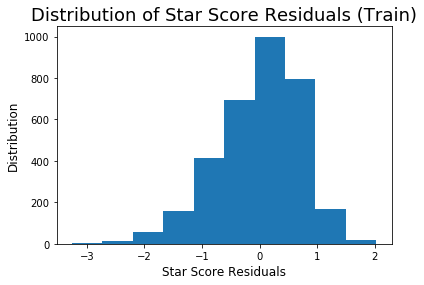

In [25]:
plt.hist(model_fit.resid)
plt.title('Distribution of Star Score Residuals (Train)', fontsize=18)
plt.xlabel('Star Score Residuals', fontsize=12)
plt.ylabel('Distribution', fontsize=12);

To see if the model is performing consistently across the whole set of data, I'll use cross validation.

In [26]:
# in-sample
in_lr = linear_model.LinearRegression()
in_lr.fit(X_1, y_train)
y_pred_in = in_lr.predict(X_1)
np.sqrt(mean_squared_error(y_train, y_pred_in))

0.72226231809560981

In [27]:
# out-of-sample
out_lr = linear_model.LinearRegression()
out_scores = cross_val_score(out_lr, X_1, y_train, scoring='neg_mean_squared_error', cv = 5) * -1
np.sqrt(out_scores.mean())

0.72765779235285288

I get a slightly higher root mean squared error on the out-of-sample data than the in-sample data. This means that the model generalizes the data well. I am now ready to test the model on the test set.

In [28]:
X_test_final = X_test[[
    'Runtime',
    'MovieLens_Score',
    'Imdb_Score',
    'Genre_Animation',
    'Genre_Comedy',
    'Genre_Crime',
    'Genre_Documentary',
    'Genre_Drama',
    'Genre_Family',
    'Genre_Music',
    'Genre_Thriller',
    'Sub_Genre_Animation',
    'Sub_Genre_Comedy',
    'Sub_Genre_Family',
    'Sub_Genre_Fantasy',
    'Sub_Genre_Horror',
    'Sub_Genre_No Sub-genre',
    'Sub_Genre_Romance'
]]
y_pred_test = model_fit.predict(X_test_final)
np.sqrt(mean_squared_error(y_test, y_pred_test))

0.73038467520542849

I get a final root mean squared error of 0.73, meaning my model's predictions are off by slightly more than a half star rating. Looking at the model visualization, this model loses some accuracy as Ebert's rating decreases. Even at the higher ratings, the model does not perform terribly, but it could definately be improved.

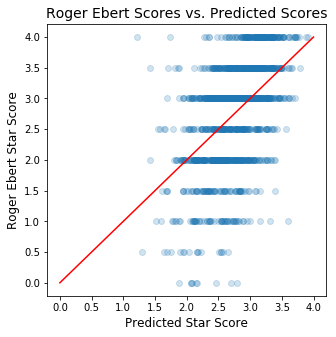

In [29]:
plt.figure(figsize=(5,5))
plt.scatter(y_pred_test, y_test, alpha=0.2)
plt.plot([0,4], [0,4], 'r')
plt.title('Roger Ebert Scores vs. Predicted Scores', fontsize=14)
plt.xlabel('Predicted Star Score', fontsize=12)
plt.ylabel('Roger Ebert Star Score', fontsize=12);

Now that the model is finished, I get some recent movies and plug their values into the model to get a predicted rating out of four stars.

In [30]:
Dunkirk = np.array([106,3.98,8.4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0])
Emoji_Movie = np.array([86,1.08,2.2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0])
La_La_Land = np.array([128,3.80,8.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1])
Mad_Max_Fury_Road = np.array([120,3.83,8.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0])
print('Dunkirk:', model_fit.predict(Dunkirk)[0])
print('The Emoji Movie:', model_fit.predict(Emoji_Movie)[0])
print('La La Land:', model_fit.predict(La_La_Land)[0])
print('Mad Max Fury Road:', model_fit.predict(Mad_Max_Fury_Road)[0])

Dunkirk: 3.60841243622
The Emoji Movie: 1.39077104703
La La Land: 3.17212552595
Mad Max Fury Road: 3.81645480448
